###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

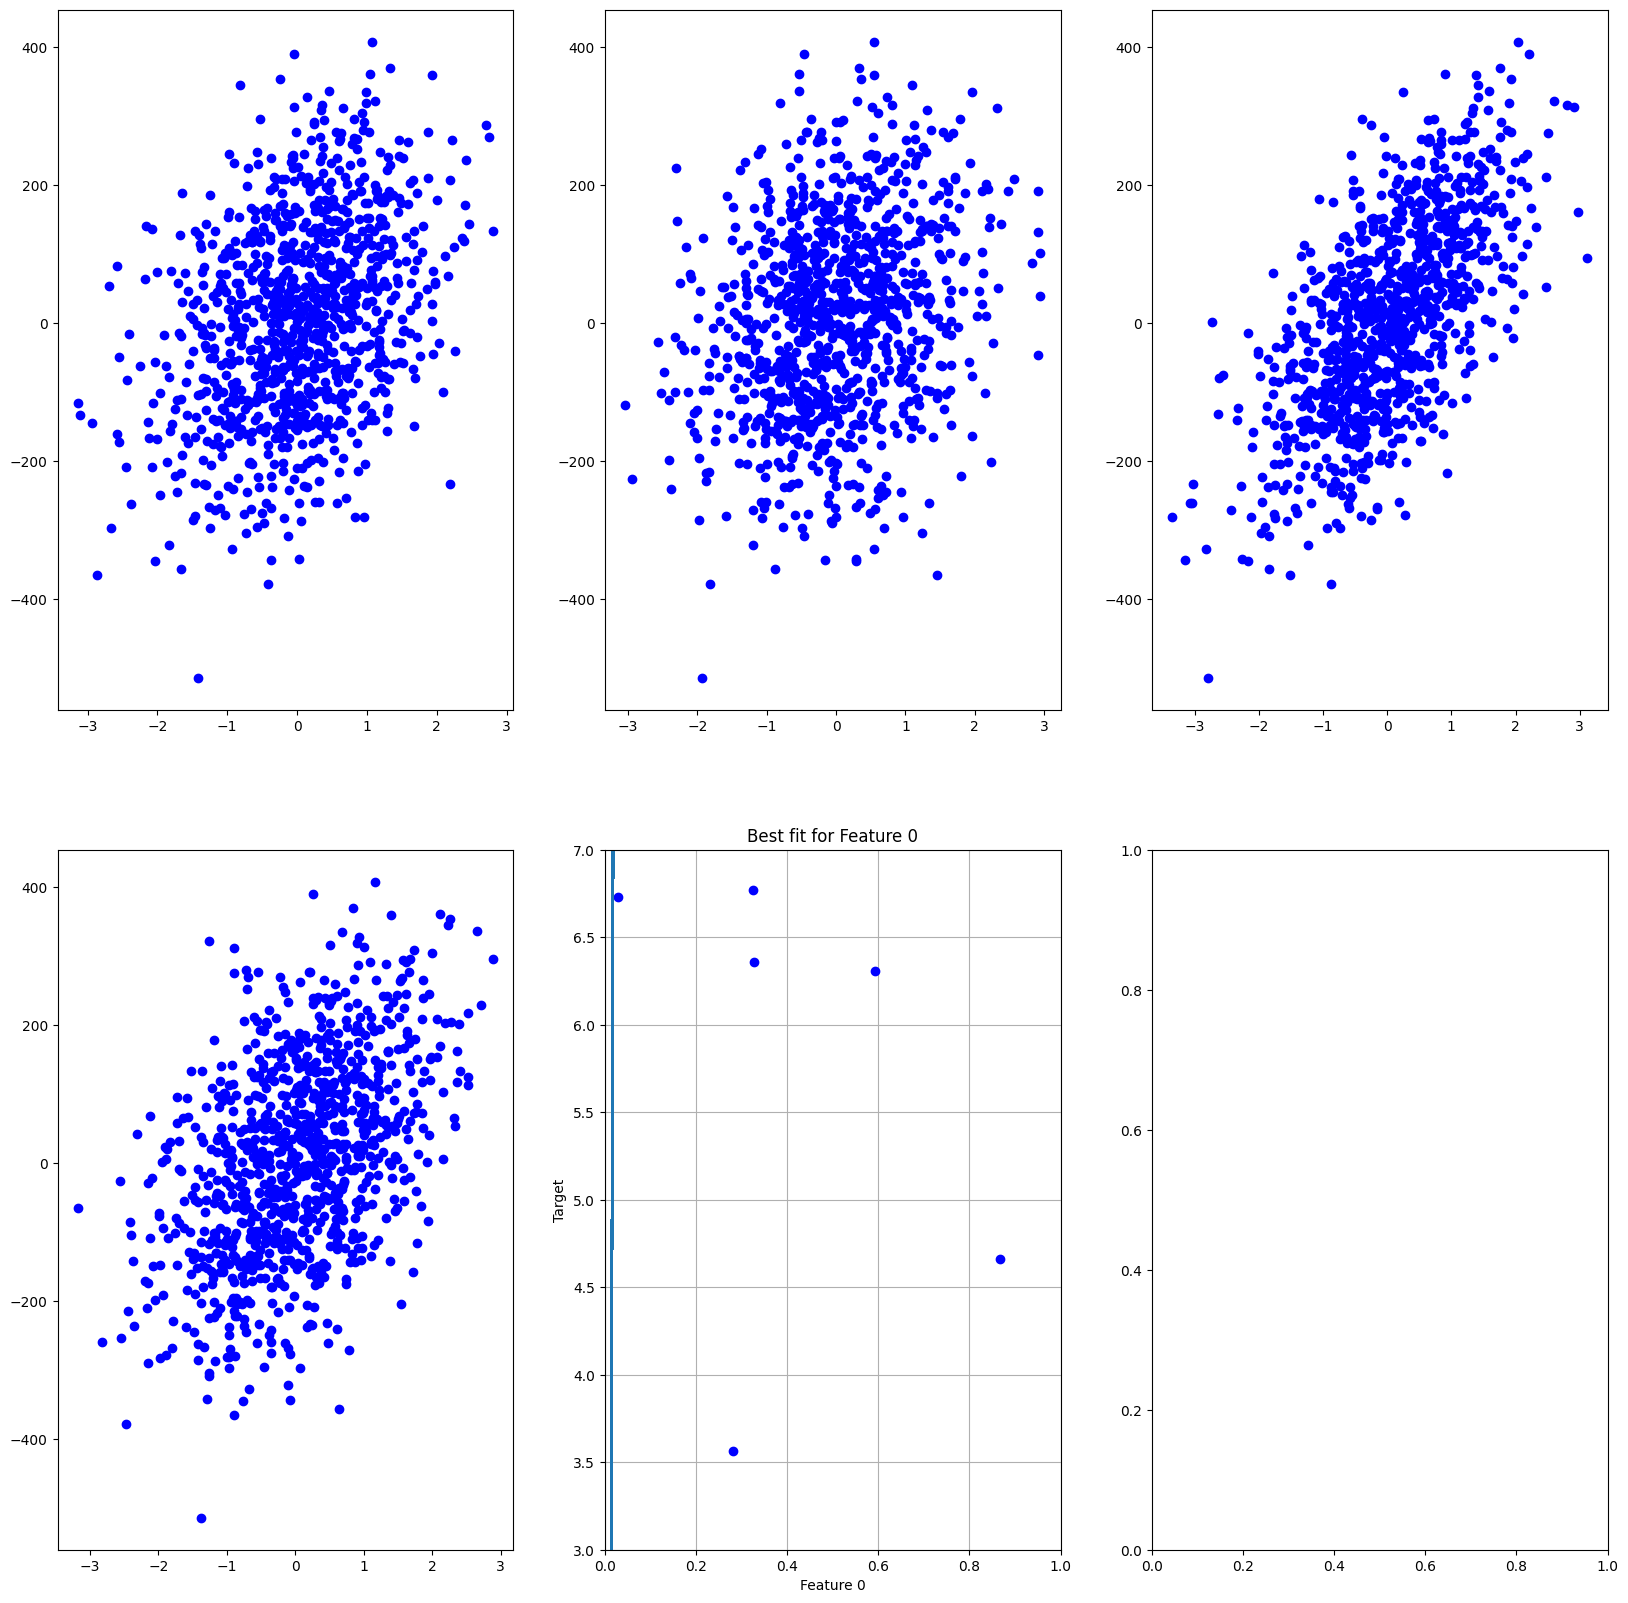

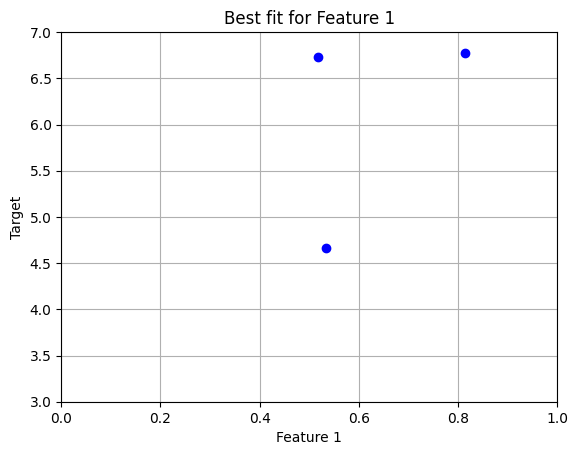

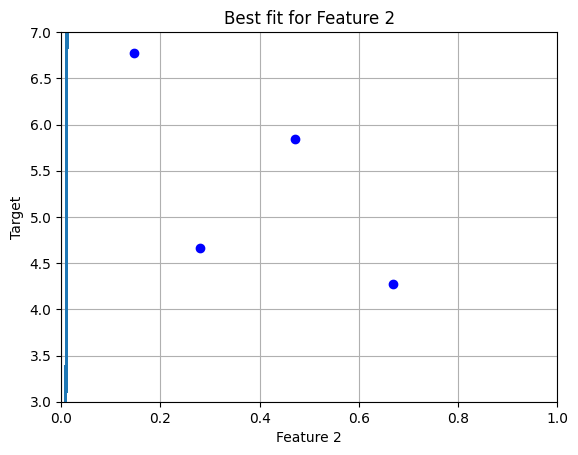

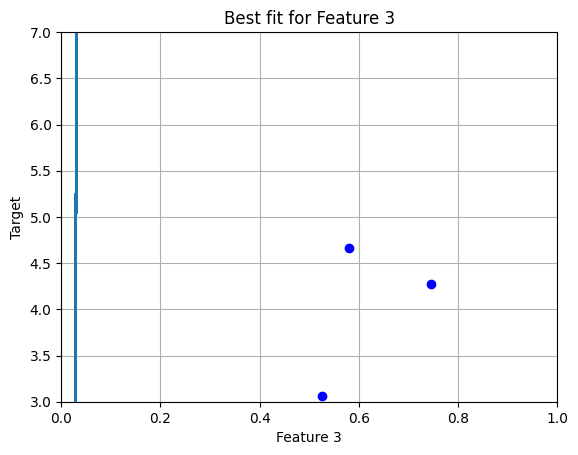

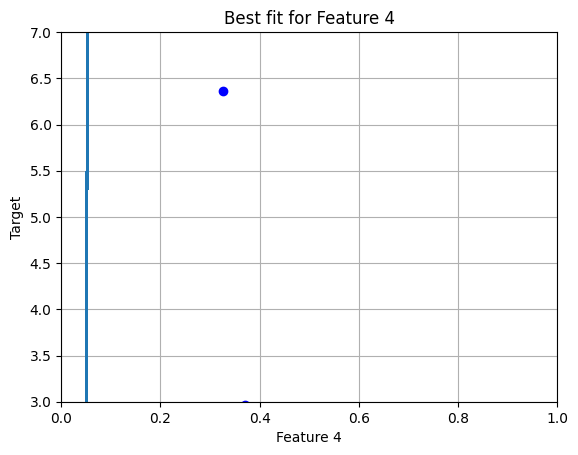

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression as mr
# X contains the values for each feature and y is the target variable
X,y = mr(n_samples=1000, n_features=5, noise=0)

#X = X/(np.max(X)) 
#y = y/(np.max(y))

# Plotting values of y for each feature in x
fig2,ax= plt.subplots(2,3,figsize=(20,20))
for i in range(5):
  plt.subplot(231+i)
  plt.scatter(X[:,i],y, color='blue')

# Plotting the best fit line for each feature
for i in range(5): 
  #initialising parameter
  m = np.size(y)
  Xi = X[:,i].reshape([1000,1])
  x = np.hstack([np.ones_like(Xi),Xi])
  theta = np.zeros([2,1])


  # Definig a cost function
  def computecost(x,y,theta):
      
      a = 1/(2*m)
      b = np.sum(((x@theta)-y)**2)
      j = (a)*(b)
      return j

  # defining a function for gradient descend algorithm

  def gradient(x,y,theta):
      
      alpha = 0.00001
      iteration = 2000
  #gradient descend algorithm
      J_history = np.zeros([iteration, 1]);
      for iter in range(0,2000):
        error = (x @ theta) -y
        temp0 = theta[0] - ((alpha/m) * np.sum(error*x[:,0]))
        temp1 = theta[1] - ((alpha/m) * np.sum(error*x[:,1]))
        theta = np.array([temp0,temp1]).reshape(2,1)
        J_history[iter] = (1 / (2*m) ) * (np.sum((error)**2))   

      #compute J value for each iteration 

      return theta, J_history

  theta , J = gradient(x,y,theta)


  #plot linear fit for our theta
  plt.plot(Xi,y,'bo')
  plt.plot(Xi,x@theta,'-')
  plt.axis([0,1,3,7])
  plt.ylabel('Target')
  plt.xlabel(f'Feature {i}')
  plt.title(f'Best fit for Feature {i}')
  plt.grid()
  plt.show()



### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

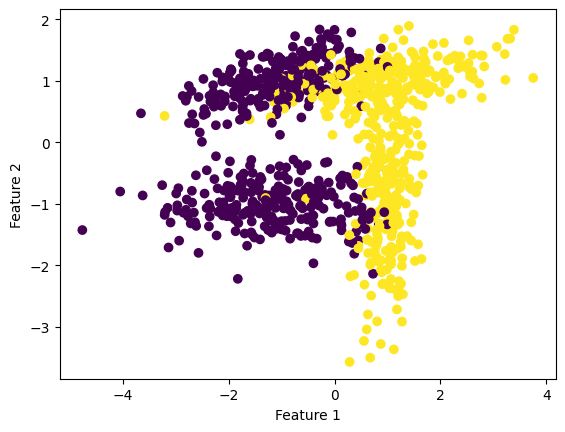

In [37]:
from sklearn.datasets import make_classification
# Creating the data
X,y= make_classification(n_samples=1000,n_features=2, n_informative=2, n_redundant=0,n_classes=2,n_clusters_per_class=2)

#potting the data
plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

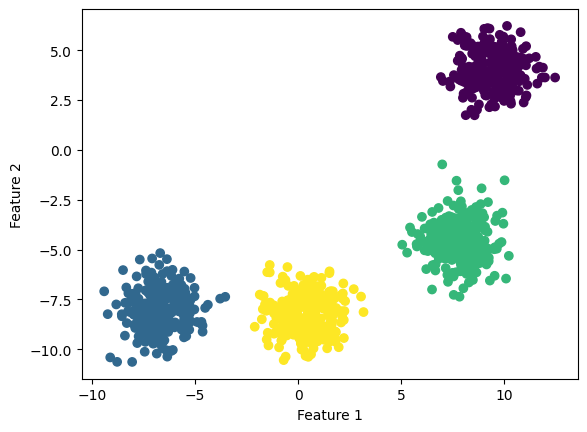

In [38]:
from sklearn.datasets import make_blobs
#Creating the data
X,y = make_blobs(n_samples=1000, centers=4, n_features=2)

#plotting the data
plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [59]:
import requests as req
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://www.worldometers.info/coronavirus/'
# Making a get request to the page
page= req.get(url)

# Making the data readable
soup = BeautifulSoup(page.text, 'lxml')

# Finding the table that we need
table = soup.find('table', class_='main_table_countries')

# Catagorising the data
headers = []
first_row=table.find('tr');

for i in first_row.find_all('th'):
 title = i.text
 headers.append(title)

expected_headers = ['Country', 'Continent', 'Population', 
                    'TotalCases', 'NewCases', 'TotalDeaths', 
                    'NewDeaths','TotalRecovered', 'NewRecovered', 
                    'ActiveCases']

# Storing the data in a Pandas Data frame
mydata = pd.DataFrame(columns = headers)
for j in table.find_all('tr')[1:]:
  row_data = j.find_all('td')
  row = [i.text for i in row_data]
  length = len(mydata)
  mydata.loc[length] = row

required_data = (mydata[column] for column in expected_headers if column in headers)
for column in required_data:
  print(column)

0          North America
1                   Asia
2                 Europe
3          South America
4      Australia/Oceania
             ...        
242        South America
243    Australia/Oceania
244               Africa
245                     
246                  All
Name: Continent, Length: 247, dtype: object
0       
1       
2       
3       
4       
      ..
242     
243     
244     
245     
246     
Name: Population, Length: 247, dtype: object
0      126,648,037
1      217,297,373
2      249,250,449
3       68,674,084
4       14,323,646
          ...     
242     68,674,084
243     14,323,646
244     12,823,223
245            721
246    689,017,533
Name: TotalCases, Length: 247, dtype: object
0         +217
1      +11,079
2       +2,576
3             
4       +2,022
        ...   
242           
243     +2,022
244           
245           
246    +15,894
Name: NewCases, Length: 247, dtype: object
0      1,632,544
1      1,546,260
2      2,059,529
3      1,355,584
4      

# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

Counter({1: 945, 0: 55})


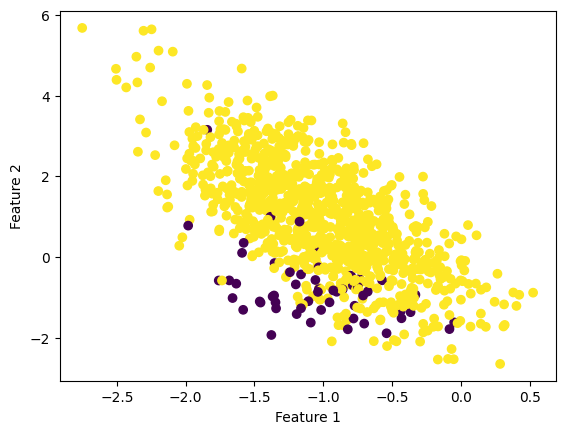

Counter({1: 945, 0: 945})


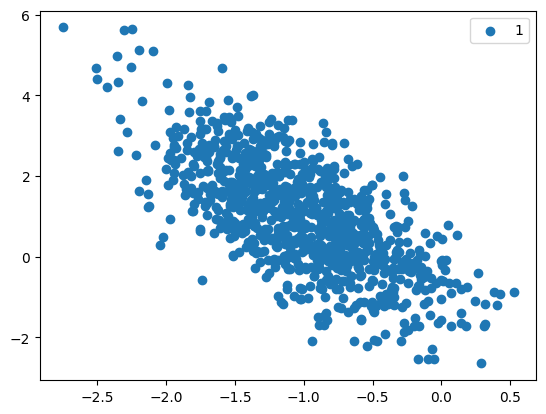

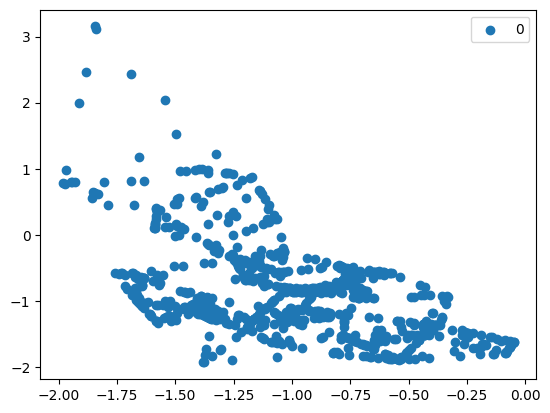

Counter({0: 945, 1: 945})


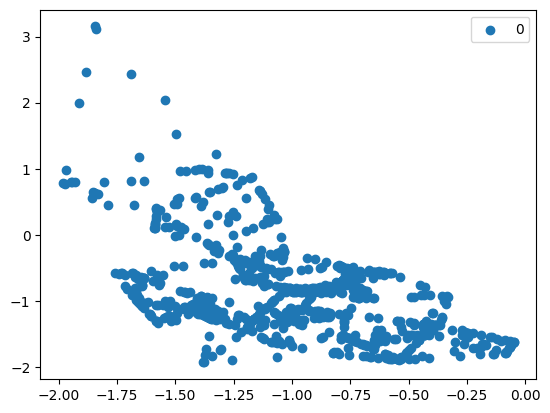

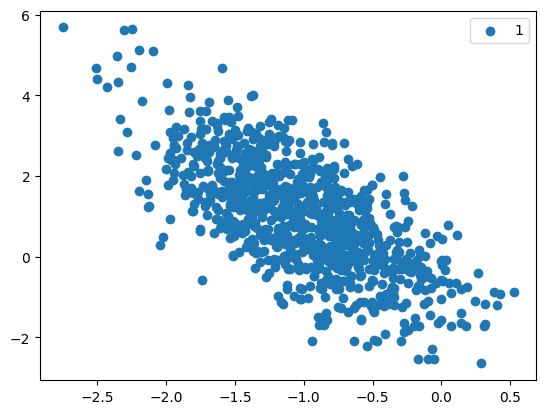

In [76]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from numpy import where
# Generating the data 
X,y= make_classification(n_samples=1000,n_features=2, n_informative=2, n_redundant=0,n_classes=2,n_clusters_per_class=1,weights=[.05])
# Verifying the weights
counter = Counter(y)
print(counter)

# The plot
plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#Oversampling the data using SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
  plt.legend()
  plt.show()

# Under Sampling the class
undersample = RandomUnderSampler()
X,y = undersample.fit_resample(X,y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
  plt.legend()
  plt.show()



##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [103]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

# loading the data
data_set = load_iris()

# Removing the attributes
X,y = data_set.data,data_set.target

# Storing the data in the data frame df
df = DataFrame(X)

# Displaying the first 5 rows
df.head(5)

# Checking for missing values in the data frame
df.info()
# No null values obtained 

# Splitting the data into test and train
train,test = train_test_split(df,test_size = 0.3 , train_size = 0.7)

# Printing the dimesions
print(train.shape)
print(test.shape)

# Standardising the data
scaler = StandardScaler()
scaler.fit(X,y)
scaled_training_set = StandardScaler.transform(scaler,train)

scaled_testing_set = StandardScaler.transform(scaler,test)

#Printing the head of training set
scaled_training_set[:5]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
(105, 4)
(45, 4)


array([[-1.38535265,  0.32841405, -1.22655167, -1.3154443 ],
       [ 0.18982966, -1.97355361,  0.70592084,  0.3957741 ],
       [-0.41600969, -1.74335684,  0.13754657,  0.13250973],
       [ 0.67450115, -0.82256978,  0.87643312,  0.92230284],
       [ 0.31099753, -1.05276654,  1.0469454 ,  0.26414192]])